In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import matplotlib as mpl
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

import time
import warnings

import scipy.stats

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def create_climo(dataset, time='time', value ='t2m'):
    climatology = dataset.groupby(f'{time}.month').mean(dim=time)
    return climatology

def create_anom(dataset, time='time', value = 't2m'):
    anomaly= dataset.groupby(f'{time}.dayofyear')- dataset.groupby(f'{time}.dayofyear').mean(dim=time)
    return anomaly

In [9]:
#Opening 2 meter temperature dataset

file = "/scratch/kbarrag/era5.t2m.day.4x.mean.1979-2019.nc"
ds_t2m_era5 = xr.open_dataset(file)
ds_t2m_era5

<xarray.Dataset>
Dimensions:    (longitude: 741, latitude: 381, time: 14853)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 -179.2 ... 4.5 4.75 5.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -4.5 -4.75 -5.0
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-08-31
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-25 17:45:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [23]:

# Assuming 'your_dataset' is your xarray dataset
# 'specific_date' should be a datetime object representing the date you want to select
specific_date = pd.to_datetime('1982-01-06')

# Select data for the specific date
data_for_specific_date = ds_t2m_era5.sel(time=specific_date)

# Print the data
print(data_for_specific_date)


<xarray.Dataset>
Dimensions:    (longitude: 741, latitude: 381)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 -179.2 ... 4.5 4.75 5.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -4.5 -4.75 -5.0
    time       datetime64[ns] 1982-01-06
Data variables:
    t2m        (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-25 17:45:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


In [26]:
#Now selecting the month of january (for now) for every year we have data

months_to_extract = [1] 
ds_j = ds_t2m_era5.where(ds_t2m_era5['time.month'].isin(months_to_extract), drop=True)
ds_j

<xarray.Dataset>
Dimensions:    (time: 1271, latitude: 381, longitude: 741)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 -179.2 ... 4.5 4.75 5.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -4.5 -4.75 -5.0
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-01-31
Data variables:
    t2m        (time, latitude, longitude) float32 247.3 247.3 ... 301.0 301.0
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-25 17:45:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [27]:
# Create a daily mean a based on the day of the year to create a daily climatology

jan_climo = ds_j.groupby('time.dayofyear').mean()
jan_climo

<xarray.Dataset>
Dimensions:    (dayofyear: 31, latitude: 381, longitude: 741)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 -179.2 ... 4.5 4.75 5.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -4.5 -4.75 -5.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31
Data variables:
    t2m        (dayofyear, latitude, longitude) float32 248.8 248.8 ... 299.9
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-25 17:45:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [42]:

# Assuming 'your_dataset' is your xarray dataset
# 'specific_date' should be a datetime object representing the date you want to select
# specific_date = pd.to_datetime('1982-01-06')

# Select data for the specific date
data_for_specific_date = jan_climo.sel(dayofyear=6)

# Print the data
print(data_for_specific_date)


<xarray.Dataset>
Dimensions:    (latitude: 381, longitude: 741)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 -179.2 ... 4.5 4.75 5.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -4.5 -4.75 -5.0
    dayofyear  int64 6
Data variables:
    t2m        (latitude, longitude) float32 248.9 248.9 248.9 ... 299.1 299.1
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-25 17:45:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


In [41]:
import xarray as xr

# Assuming 'ds_j' is your xarray dataset
# Assuming 'jan_climo' is your climatology for January

# Select a specific day (e.g., day 18)
specific_day_data = ds_j.sel(time='1982-01-06')  # Adjust the date accordingly

# Calculate the anomaly for the specific day
specific_day_anomaly = specific_day_data - jan_climo

print(specific_day_anomaly)


<xarray.Dataset>
Dimensions:    (longitude: 741, latitude: 381, dayofyear: 31)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 -179.2 ... 4.5 4.75 5.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -4.5 -4.75 -5.0
    time       datetime64[ns] 1982-01-06
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31
Data variables:
    t2m        (latitude, longitude, dayofyear) float32 nan nan nan ... nan nan


In [28]:
#Now creating the anomalies 

jan_daily_anomaly= ds_j.groupby('time.dayofyear') - jan_climo
jan_daily_anomaly

<xarray.Dataset>
Dimensions:    (longitude: 741, latitude: 381, time: 1271)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 -179.2 ... 4.5 4.75 5.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -4.5 -4.75 -5.0
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-01-31
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 23 24 25 26 27 28 29 30 31
Data variables:
    t2m        (time, latitude, longitude) float32 -1.523 -1.523 ... 1.025 1.052

In [29]:

# Assuming 'your_dataset' is your xarray dataset
# 'specific_date' should be a datetime object representing the date you want to select
specific_date = pd.to_datetime('1982-01-06')

# Select data for the specific date
data_for_specific_date = jan_daily_anomaly.sel(time=specific_date)

# Print the data
print(data_for_specific_date)


<xarray.Dataset>
Dimensions:    (longitude: 741, latitude: 381)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 -179.2 ... 4.5 4.75 5.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -4.5 -4.75 -5.0
    time       datetime64[ns] 1982-01-06
    dayofyear  int64 6
Data variables:
    t2m        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan


In [15]:
#Now creating the anomalies 

ds_t2m_anomaly_era5= create_anom(ds_t2m_era5)
ds_t2m_anomaly_era5

<xarray.Dataset>
Dimensions:    (longitude: 741, latitude: 381, time: 14853)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 -179.2 ... 4.5 4.75 5.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -4.5 -4.75 -5.0
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-08-31
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 ... 236 237 238 239 240 241 242 243
Data variables:
    t2m        (time, latitude, longitude) float32 -1.523 -1.523 ... 0.5548

In [24]:

# Assuming 'your_dataset' is your xarray dataset
# 'specific_date' should be a datetime object representing the date you want to select
specific_date = pd.to_datetime('1982-01-06')

# Select data for the specific date
data_for_specific_date = ds_t2m_anomaly_era5.sel(time=specific_date)

# Print the data
print(data_for_specific_date)


<xarray.Dataset>
Dimensions:    (longitude: 741, latitude: 381)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 -179.2 ... 4.5 4.75 5.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -4.5 -4.75 -5.0
    time       datetime64[ns] 1982-01-06
    dayofyear  int64 6
Data variables:
    t2m        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan


In [17]:
#These are the specific dates from Smith 2015 within the month of jan that are relevant to the time period in dataset
#Turning them into datetime format

specific_dates = ['1981-01-07','1982-01-06','1984-01-13','1985-01-29','1988-01-04','1989-01-31','1994-01-12','1996-01-25','2010-01-02', 
                  '1979-02-05','1980-02-26','2007-02-01','2015-02-12',
                 '1983-12-14','1985-12-13','1989-12-11', '1995-12-07', '2000-12-17','2000-12-29','2005-12-01']
cao_dates = pd.to_datetime(specific_dates)
cao_dates_sorted = cao_dates.sort_values()
cao_dates_sorted

DatetimeIndex(['1979-02-05', '1980-02-26', '1981-01-07', '1982-01-06',
               '1983-12-14', '1984-01-13', '1985-01-29', '1985-12-13',
               '1988-01-04', '1989-01-31', '1989-12-11', '1994-01-12',
               '1995-12-07', '1996-01-25', '2000-12-17', '2000-12-29',
               '2005-12-01', '2007-02-01', '2010-01-02', '2015-02-12'],
              dtype='datetime64[ns]', freq=None)

In [22]:

# Assuming 'your_dataset' is your xarray dataset
# 'specific_date' should be a datetime object representing the date you want to select
specific_date = pd.to_datetime('1982-01-06')

# Select data for the specific date
data_for_specific_date = cao_dates_era5.sel(time=specific_date)

# Print the data
print(data_for_specific_date)


<xarray.Dataset>
Dimensions:    (longitude: 741, latitude: 381)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 -179.2 ... 4.5 4.75 5.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -4.5 -4.75 -5.0
    time       datetime64[ns] 1982-01-06
    dayofyear  int64 6
Data variables:
    t2m        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan


In [18]:
#using the specific cao dates and selecting them from the anomaly dataset
cao_dates_era5= ds_t2m_anomaly_era5.sel(time=cao_dates_sorted)
cao_dates_era5

<xarray.Dataset>
Dimensions:    (longitude: 741, latitude: 381, time: 20)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 -179.2 ... 4.5 4.75 5.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -4.5 -4.75 -5.0
  * time       (time) datetime64[ns] 1979-02-05 1980-02-26 ... 2015-02-12
    dayofyear  (time) int64 36 57 7 6 348 13 29 347 ... 25 352 364 335 32 2 43
Data variables:
    t2m        (time, latitude, longitude) float32 -2.651 -2.651 ... 0.08514

/home/kbarrag/.conda/envs/clim_data/lib/python3.10/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/kbarrag/.conda/envs/clim_data/lib/python3.10/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Text(0.5, 0.98, '500mb Geopotential Height for Selected Cold Air Outbreaks from 1979-2019')

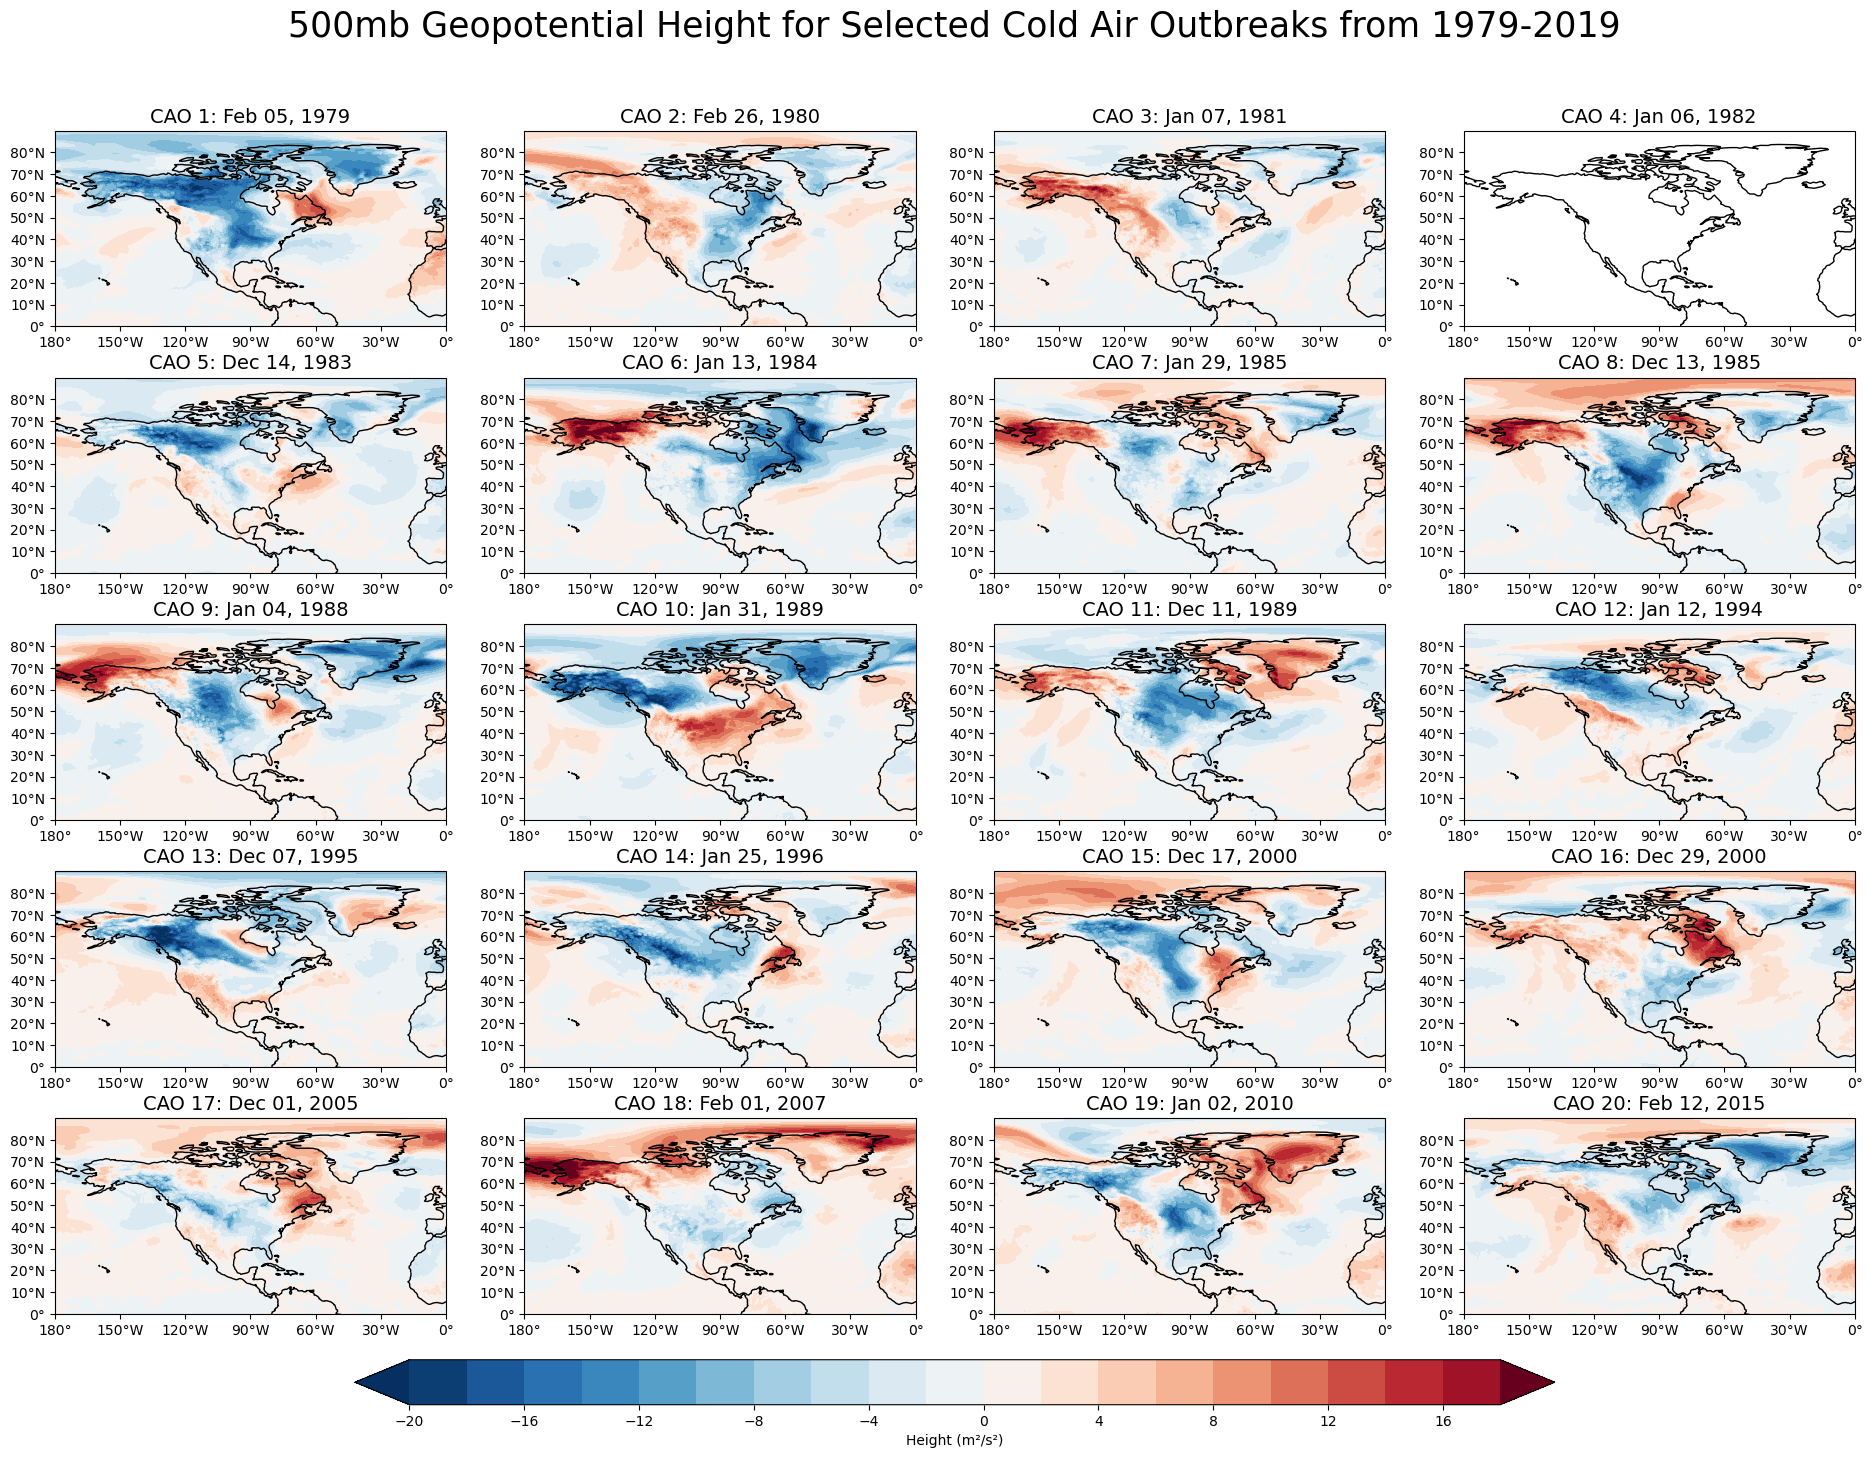

In [20]:
#Now to combine with a 'for' loop to create the plot
                
# Define the figure and each axis for the 4 rows and 3 columns
fig, axs = plt.subplots(nrows=5,ncols=4,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,15))

 
# We will flatten it into a 1-D array
axs=axs.flatten()

min_z500= cao_dates_era5['t2m'].min()
max_z500= cao_dates_era5['t2m'].max()


clevs = np.arange(-20,20,2)

divnorm = colors.CenteredNorm(vcenter=0)

axs=axs.flatten()

#Loop over all of the day and plot
for i, time in enumerate(cao_dates_era5['time']):

    # Select the day
    data=cao_dates_era5['t2m'].sel(time=time)

    # Add the cyclic point
    data,lons=add_cyclic_point(data,coord=cao_dates_era5['longitude'])

    cs1=axs[i].contourf(lons, 
                cao_dates_era5['latitude'],data,
                clevs,
                norm=divnorm,
                cmap= "RdBu_r",
                transform = ccrs.PlateCarree(),
                extend='both')
    
    # Title each subplot with the name of the model
    formatted_date = time.dt.strftime('%b %d, %Y').values
    axs[i].set_title(f'CAO {i+1}: {formatted_date}', fontsize=14)
    
    #axs[i].set_title(time.values)
    axs[i].set_extent([-180, 0, 90, 0], ccrs.PlateCarree())

    # Draw the coastines for each subplot
    axs[i].coastlines()
    
    axs[i].set_xticks(np.arange(-180,181,30), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    # Define the yticks for latitude
    axs[i].set_yticks(np.arange(0,90,10), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter) 

    axs[i].set_extent([-180, 0, 90, 0], ccrs.PlateCarree())
    
    fig.subplots_adjust( top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.25)

#Colorbar(location, how far to bottom, how long,how tall
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03])
cbar=fig.colorbar(cs1, cax=cbar_ax,orientation='horizontal',label='Height (m\u00b2/s\u00b2)')



plt.suptitle('500mb Geopotential Height for Selected Cold Air Outbreaks from 1979-2019', fontsize=25 )